In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class MAB:
    def __init__(self, k=10):
        self.k = k
        #true average
        self.true_values = np.random.normal(0, 1, k) 

    def pull(self, action):
        return np.random.normal(self.true_values[action], 1)  # 返回带噪声的 reward

In [8]:
class EpsilonGreedyAgent:
    def __init__(self, k, epsilon):
        self.k = k
        self.epsilon = epsilon
        self.counts = np.zeros(k)
        self.estimates = np.zeros(k)

    def select_action(self, t):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.estimates)

    def update(self, action, reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.estimates[action] += alpha * (reward - self.estimates[action])

In [9]:
class UCBAgent:
    def __init__(self, k, c):
        self.k = k
        self.c = c
        self.counts = np.zeros(k)
        self.estimates = np.zeros(k)
        self.total_count = 0

    def select_action(self, t):
        self.total_count += 1
        if 0 in self.counts:
            return np.argmin(self.counts)  # 确保每个臂至少被拉一次
        ucb_values = self.estimates + self.c * np.sqrt(np.log(self.total_count) / self.counts)
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.estimates[action] += alpha * (reward - self.estimates[action])

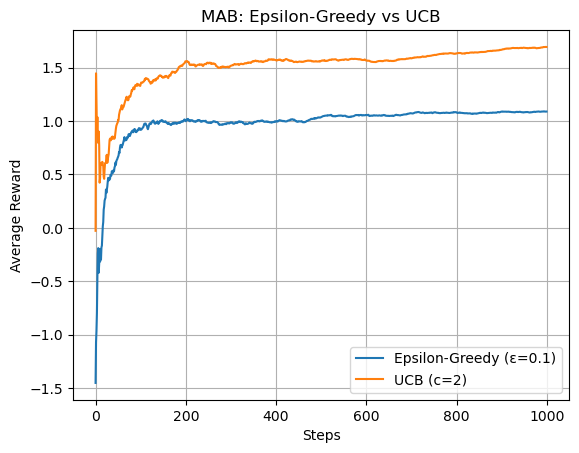

In [10]:
#Experiment
def run_experiment(agent, env, steps):
    rewards = np.zeros(steps)
    for t in range(steps):
        action = agent.select_action(t)
        reward = env.pull(action)
        agent.update(action, reward)
        rewards[t] = reward
    return rewards

def compare():
    steps = 1000
    k = 10
    env1 = MAB(k)
    env2 = MAB(k)
    agent_eps = EpsilonGreedyAgent(k, epsilon=0.1)
    agent_ucb = UCBAgent(k, c=2)

    rewards_eps = run_experiment(agent_eps, env1, steps)
    rewards_ucb = run_experiment(agent_ucb, env2, steps)

    avg_rewards_eps = np.cumsum(rewards_eps) / (np.arange(steps) + 1)
    avg_rewards_ucb = np.cumsum(rewards_ucb) / (np.arange(steps) + 1)

    plt.plot(avg_rewards_eps, label='Epsilon-Greedy (ε=0.1)')
    plt.plot(avg_rewards_ucb, label='UCB (c=2)')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('MAB: Epsilon-Greedy vs UCB')
    plt.legend()
    plt.grid(True)
    plt.show()

compare()